# Logestic Regression and Gaussian Naive Implementation
Experiment to verify whether the weights of logistic regression converge using gradient ascent, even when starting from different initial points.

[0.         5.27904354 5.27904354 5.27904354]
[0.         5.27904354 5.29242852 5.27904354]


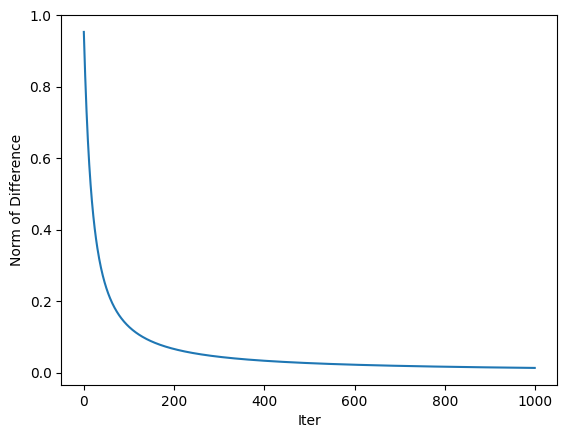

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def LR_GA(X, y, w_init, eta, num_iterations):
    # Initial w
    w = np.array(w_init, dtype=float)
    N = len(y)
    store = []
    
    for iteration in range(num_iterations):
        # Compute predicted probabilities
        z = np.dot(X, w)
        predictions = sigmoid(z)
        
        #  gradient
        gradient = np.dot(X.T, (y - predictions))
        
        # weights
        w += eta * gradient
        
        temp = w
        
        store.append([temp[0],temp[1],temp[2],temp[3]])

        
        
        log_likelihood = np.sum(y * np.log(predictions + 1e-5) + (1 - y) * np.log(1 - predictions + 1e-5))
        
        
    return w,store


X = np.array([
    [1, 0, 0],  
    [0, 0, 1],  
    [0, 1, 0],  
    [-1, 0, 0], 
    [0, -1, 0], 
    [0, 0, -1]  
])

X_b = np.hstack([np.zeros((X.shape[0], 1)), X]) 


y = np.array([1, 1, 1, 0, 0, 0])


w_init_1 = [0,0,0,0] 
w_init_2 = [0,0,1,0]  
eta = 0.1
num_iterations = 1000


w_final_1,w_s_1 = LR_GA(X_b, y, w_init_1, eta, num_iterations)

w_final_2,w_s_2 = LR_GA(X_b, y, w_init_2, eta, num_iterations)

print(w_final_1)

print(w_final_2)
norm_s = []
for i in range(num_iterations):
    t1 = np.array(w_s_1[i])
    t2 = np.array(w_s_2[i])
    a = t1-t2
    norm = np.linalg.norm(a)
    norm_s.append(norm)

# print(norm_s)
# print(num)
num = []
for i in range(num_iterations):
    num.append(i)


plt.plot(num, norm_s)  


plt.xlabel('Iter')
plt.ylabel('Norm of Difference')


plt.show()




## Learning Curve for Logestic Regression and Gaussian Naive bayes 

/var/folders/bd/vvxs9fl57pd2s_06f8z2wz6h0000gn/T/ipykernel_49329/2082019556.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/bd/vvxs9fl57pd2s_06f8z2wz6h0000gn/T/ipykernel_49329/2082019556.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/bd/vvxs9fl57pd2s_06f8z2wz6h0000gn/T/ipykernel_49329/2082019556.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/bd/vvxs9fl57pd2s_06f8z2wz6h0000gn/T/ipykernel_49329/2082019556.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/bd/vvxs9fl57pd2s_06f8z2wz6h0000gn/T/ipykernel_49329/2082019556.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/bd/vvxs9fl57pd2s_06f8z2wz6h0000gn/T/ipykernel_49329/2082019556.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/bd/vvxs9fl57pd2s_06f8z2wz6h0000gn/T/ipykernel

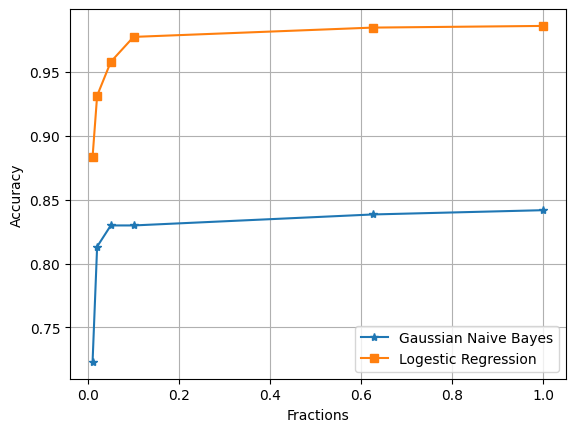

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def cross_validation_split(X, y, k=3):
    indices = np.random.permutation(len(X))
    fold_size = len(X) // k
    folds = []
    
    for i in range(k - 1):
        fold_indices = indices[i * fold_size:(i + 1) * fold_size]
        folds.append((X[fold_indices], y[fold_indices]))
    
    fold_indices = indices[(k - 1) * fold_size:]
    folds.append((X[fold_indices], y[fold_indices]))
    
    return folds


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def GR_LR(X, y, w_init, eta, num_iterations):
    w = np.array(w_init, dtype=float)
    N = len(y)
    store = []
    
    for i in range(num_iterations):
        
        z = np.dot(X, w)
        predictions = sigmoid(z)
        
        
        gradient = np.dot(X.T, (y - predictions))
        
        
        w += eta * gradient
        
        # temp = w.copy()
        # store.append(temp)
        
        # log_like = np.sum(y * np.log(predictions + 1e-5) + (1 - y) * np.log(1 - predictions + 1e-5))
        #print(log_likelihood)

    return w



def predict_LR(X, weights):
    return (sigmoid(np.dot(X, weights)) >= 0.5).astype(int) 

def learn_LR(X, y, eta, num_iterations, fractions, k):
    accuracies = {frac: [] for frac in fractions}  
    
    folds = cross_validation_split(X, y, k)
    
    for fold in range(k):
        X_test, y_test = folds[fold]  
        X_train = np.vstack([folds[i][0] for i in range(k) if i != fold])  
        y_train = np.hstack([folds[i][1] for i in range(k) if i != fold])

        for frac in fractions:
            results = []
            for i in range(5):  
                sample_size = int(frac * len(X_train))
                sample_indices = np.random.choice(len(X_train), sample_size, replace=False)
                X_train_sample = X_train[sample_indices]
                y_train_sample = y_train[sample_indices]
                # print(len(X_train_sample))
                
                w_init = np.ones(X_train_sample.shape[1])
                weights = GR_LR(X_train_sample, y_train_sample, w_init, eta, num_iterations)
                
                
                
                y_pred = predict_LR(X_test, weights)
                # print(y_pred)
                # print(y_test)
                accuracy = accuracy_score(y_test, y_pred)
                results.append(accuracy)
            
            # Average the accuracy for the current fraction
            accuracies[frac].append(np.mean(results))

    
    avg_accuracies = {frac: np.mean(accuracies[frac]) for frac in fractions}
    
    return avg_accuracies


def GP(x, mu, s2):
    a1 = 1 / np.sqrt(2 * np.pi * s2)
    a2 = np.exp(-np.square(x - mu) / (2 * s2))
    return a1 * a2

def predict(test_data, means, variances, prior_y):
    sample = test_data.shape[0]
    feature = means.shape[0]
    
    PX_y = np.zeros((sample, feature))
    
    for i in range(feature):
        PX_y[:, i] = np.prod(GP(test_data, means[i], variances[i]), axis=1)
    
    Py_X = PX_y * prior_y  
    
    return np.argmax(Py_X, axis=1)  

def parameters(X):
    label_counts = X['L'].value_counts()
    # print(label_counts)
    if 1 in label_counts:
        theta = label_counts[1] / len(X)
    else:
        theta = 0
    prior_y = np.array([1 - theta, theta])
    mean_values = X.groupby('L')[['f1', 'f2', 'f3', 'f4']].mean()
    var_values = X.groupby('L')[['f1', 'f2', 'f3', 'f4']].var()
    means = np.asarray(mean_values)
    variances = np.asarray(var_values)
    return prior_y, means, variances



def learn_gnb(X, y, fractions, k):
    folds = cross_validation_split(X, y, k)
    accuracies = {frac: [] for frac in fractions} 
    
    for fold in range(k):
        X_test, y_test = folds[fold]  
        X_train = np.vstack([folds[i][0] for i in range(k) if i != fold]) 
        y_train = np.hstack([folds[i][1] for i in range(k) if i != fold])
        
        for frac in fractions:
            results = []
            for _ in range(5):  
                
                sample_size = int(frac * len(X_train))
                sample_indices = np.random.choice(len(X_train), sample_size, replace=False)
                X_train_sample = X_train[sample_indices]
                y_train_sample = y_train[sample_indices]

               
                X_train_temp = pd.DataFrame(X_train_sample, columns=['f1', 'f2', 'f3', 'f4', 'L'])
                
                
                prior_y, means, variances = parameters(X_train_temp)
                
                predictions = predict(X_test[:, :-1], means, variances, prior_y)  
                
                accuracy = accuracy_score(y_test, predictions)
                results.append(accuracy)
            
            accuracies[frac].append(np.mean(results))

    avg_accuracies = {frac: np.mean(accuracies[frac]) for frac in fractions}
    
    return avg_accuracies



if __name__ == "__main__":

    df = pd.read_csv('data.csv')

    eta = 0.1  
    num_iterations = 100

    
    X = df[['f1', 'f2', 'f3', 'f4', 'L']].values
    y = df['L'].values

    
    frac = [0.01, 0.02, 0.05, 0.1, 0.625, 1] 

    
    gnb_acc = learn_gnb(X, y, frac, 3)


    X = df[['f1', 'f2','f3','f4']].to_numpy()
    y = df['L'].to_numpy()



    X_b = np.hstack([np.ones((X.shape[0], 1)), X])  



    LR_acc = learn_LR(X_b, y, eta, num_iterations, frac, 3)

    
    
    plt.plot(frac, [gnb_acc[i] for i in frac], label="Gaussian Naive Bayes", marker='*')
    plt.plot(frac, [LR_acc[i] for i in frac],label="Logestic Regression", marker='s')
    plt.xlabel("Fractions")
    plt.ylabel("Accuracy")

    plt.legend()
    plt.grid(True)
    plt.show()





## Generated Data using GNB

In [12]:


def parameters(X):
    label_counts = X['L'].value_counts()
    if 1 in label_counts:
        theta = label_counts[1] / len(X)
    else:
        theta = 0
    prior_y = np.array([1 - theta, theta])
    mean_values = X.groupby('L')[['f1', 'f2', 'f3', 'f4']].mean()
    var_values = X.groupby('L')[['f1', 'f2', 'f3', 'f4']].var()
    means = np.asarray(mean_values)
    variances = np.asarray(var_values)
    return prior_y, means, variances


def generate(X,num_samples):

    _,means,variances= parameters(X)
    
    num_features = means.shape[1]
    
    generated_samples = np.zeros((num_samples, num_features))
    
    for i in range(num_features):
        generated_samples[:, i] = np.random.normal(loc=means[1, i], scale=np.sqrt(variances[1, i]), size=num_samples)
    
    return generated_samples

df = pd.read_csv('data.csv')


X = df[['f1', 'f2', 'f3', 'f4', 'L']]

samples = generate(X,400)

_,means,variances= parameters(X)

mean_org = means[1]
var_org = variances[1]


mean_samp = np.mean(samples, axis=0)

var_samp = np.var(samples, axis=0)


for i in range(len(mean_samp)):
    print("In feature {} the varinace for Generated dataset is: {} and for Origanl dataset is: {}".format(i+1,var_samp[i],var_org[i]))
    print("In feature {} the mean for Generated dataset is: {} and for Origanl dataset is: {}".format(i+1,mean_samp[i],mean_org[i]))
    print("\n ")









In feature 1 the varinace for Generated dataset is: 3.3485377022611074 and for Origanl dataset is: 3.5388479770264585
In feature 1 the mean for Generated dataset is: -1.8843702555445299 and for Origanl dataset is: -1.8684425627868853

 
In feature 2 the varinace for Generated dataset is: 26.464983041311214 and for Origanl dataset is: 29.212768354092102
In feature 2 the mean for Generated dataset is: -0.9087335330935475 and for Origanl dataset is: -0.993576124590164

 
In feature 3 the varinace for Generated dataset is: 28.335846255523144 and for Origanl dataset is: 27.68665430933135
In feature 3 the mean for Generated dataset is: 1.8781537533030632 and for Origanl dataset is: 2.148271008852459

 
In feature 4 the varinace for Generated dataset is: 4.366613036136283 and for Origanl dataset is: 4.288974277980399
In feature 4 the mean for Generated dataset is: -1.139929251817444 and for Origanl dataset is: -1.2466407459016393

 
